![image info](https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/images/banner_1.png)

# Proyecto 1 - Predicción de popularidad en canción

En este proyecto podrán poner en práctica sus conocimientos sobre modelos predictivos basados en árboles y ensambles, y sobre la disponibilización de modelos. Para su desarrollo tengan en cuenta las instrucciones dadas en la "Guía del proyecto 1: Predicción de popularidad en canción".

**Entrega**: La entrega del proyecto deberán realizarla durante la semana 4. Sin embargo, es importante que avancen en la semana 3 en el modelado del problema y en parte del informe, tal y como se les indicó en la guía.

Para hacer la entrega, deberán adjuntar el informe autocontenido en PDF a la actividad de entrega del proyecto que encontrarán en la semana 4, y subir el archivo de predicciones a la [competencia de Kaggle](https://www.kaggle.com/competitions/miad-2025-12-prediccion-popularidad-en-cancion).

## Datos para la predicción de popularidad en cancion

En este proyecto se usará el conjunto de datos de datos de popularidad en canciones, donde cada observación representa una canción y se tienen variables como: duración de la canción, acusticidad y tempo, entre otras. El objetivo es predecir qué tan popular es la canción. Para más detalles puede visitar el siguiente enlace: [datos](https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset).

## Ejemplo predicción conjunto de test para envío a Kaggle

En esta sección encontrarán el formato en el que deben guardar los resultados de la predicción para que puedan subirlos a la competencia en Kaggle.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
# Importación librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
# Carga de datos de archivo .csv
dataTraining = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2025/main/datasets/dataTrain_Spotify.csv',index_col=0)
dataTesting = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2025/main/datasets/dataTest_Spotify.csv', index_col=0)

In [37]:
# Visualización datos de entrenamiento
dataTraining.head()

,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity
0,7hUhmkALyQ8SX9mJs5XI3D,Love and Rockets,Love and Rockets,Motorcycle,211533,False,0.305,0.8490,9,-10.795,1,0.0549,0.000058,0.056700,0.4640,0.3200,141.793,4,goth,22
1,5x59U89ZnjZXuNAAlc8X1u,Filippa Giordano,Filippa Giordano,"Addio del passato - From ""La traviata""",196000,False,0.287,0.1900,7,-12.030,0,0.0370,0.930000,0.000356,0.0834,0.1330,83.685,4,opera,22
2,70Vng5jLzoJLmeLu3ayBQq,Susumu Yokota,Symbol,Purple Rose Minuet,216506,False,0.583,0.5090,1,-9.661,1,0.0362,0.777000,0.202000,0.1150,0.5440,90.459,3,idm,37
3,1cRfzLJapgtwJ61xszs37b,Franz Liszt;YUNDI,Relajación y siestas,"Liebeslied (Widmung), S. 566",218346,False,0.163,0.0368,8,-23.149,1,0.0472,0.991000,0.899000,0.1070,0.0387,69.442,3,classical,0
4,47d5lYjbiMy0EdMRV8lRou,Scooter,Scooter Forever,The Darkside,173160,False,0.647,0.9210,2,-7.294,1,0.1850,0.000939,0.371000,0.1310,0.1710,137.981,4,techno,27


In [38]:
# Visualización datos de test
dataTesting.head()

,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,6KwkVtXm8OUp2XffN5k7lY,Hillsong Worship,No Other Name,No Other Name,440247,False,0.369,0.598,7,-6.984,1,0.0304,0.00511,0.000000,0.176,0.0466,148.014,4,world-music
1,2dp5I5MJ8bQQHDoFaNRFtX,Internal Rot,Grieving Birth,Failed Organum,93933,False,0.171,0.997,7,-3.586,1,0.1180,0.00521,0.801000,0.420,0.0294,122.223,4,grindcore
2,5avw06usmFkFrPjX8NxC40,Zhoobin Askarieh;Ali Sasha,Noise A Noise 20.4-1,"Save the Trees, Pt. 1",213578,False,0.173,0.803,9,-10.071,0,0.1440,0.61300,0.001910,0.195,0.0887,75.564,3,iranian
3,75hT0hvlESnDJstem0JgyR,Bryan Adams,All I Want For Christmas Is You,Merry Christmas,151387,False,0.683,0.511,6,-5.598,1,0.0279,0.40600,0.000197,0.111,0.5980,109.991,3,rock
4,4bY2oZGA5Br3pTE1Jd1IfY,Nogizaka46,バレッタ TypeD,月の大きさ,236293,False,0.555,0.941,9,-3.294,0,0.0481,0.48400,0.000000,0.266,0.8130,92.487,4,j-idol


In [6]:
# Predicción del conjunto de test - acá se genera un número aleatorio como ejemplo
np.random.seed(42)
y_pred = pd.DataFrame(np.random.rand(dataTesting.shape[0]) * 100, index=dataTesting.index, columns=['Popularity'])

In [53]:
#Codificación de las variables categoricas
dataTraining['explicit'] = pd.factorize(dataTraining.explicit)[0]
dataTraining['track_genre'] = pd.factorize(dataTraining.track_genre)[0]
dataTraining['artists'] = pd.factorize(dataTraining.artists)[0]

In [54]:
# Selección de variables
X = dataTraining.drop(columns=['track_id','album_name','track_name','popularity'])
y = dataTraining['popularity']


In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier()
clf

RandomForestClassifier()

In [56]:
pd.Series(cross_val_score(clf,X,y,cv=10)).describe()

count    10.000000
mean      0.301980
std       0.005824
min       0.293484
25%       0.297807
50%       0.301190
75%       0.304793
max       0.311153
dtype: float64

In [57]:
estimator_range = range(10,50,10)

accuracy_scores = []

for estimator in estimator_range:
    clf = RandomForestClassifier(n_estimators=estimator, random_state=1, n_jobs=-1)
    accuracy_scores.append(cross_val_score(clf,X,y,cv=5, scoring='neg_mean_squared_error').mean())


Text(0, 0.5, 'MSE')

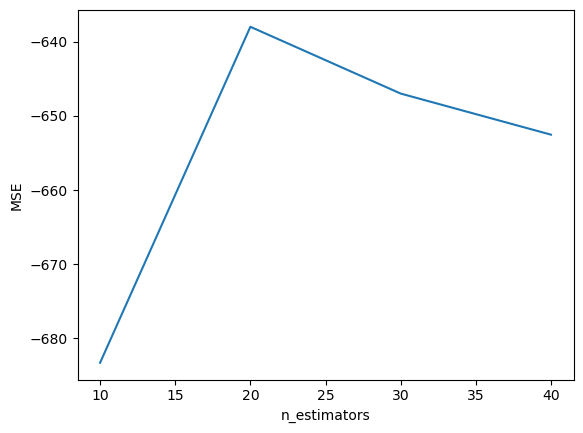

In [58]:
plt.plot(estimator_range, accuracy_scores)
plt.xlabel('n_estimators')
plt.ylabel('MSE')

In [59]:
feature_range = range(1, X.shape[1] +1)

accuracy_scores = []

for feature in feature_range:
    clf = RandomForestClassifier(n_estimators=19, max_features=feature, random_state=1, n_jobs=-1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=5, scoring='neg_mean_squared_error').mean())

Text(0, 0.5, 'MSE')

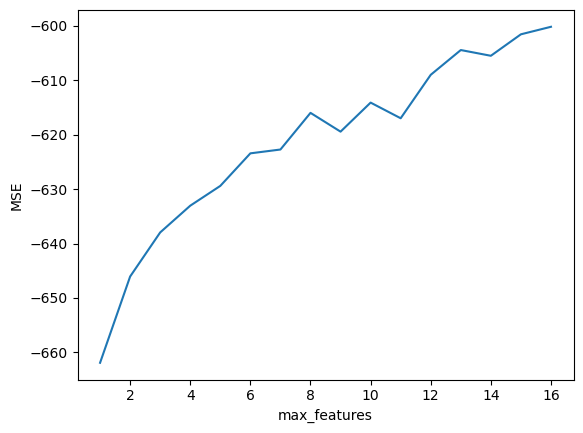

In [60]:
plt.plot(feature_range, accuracy_scores)
plt.xlabel('max_features')
plt.ylabel('MSE')

In [62]:
clf = RandomForestClassifier(n_estimators=19,max_features=16, random_state=1, n_jobs=-1)
clf.fit(X,y)

RandomForestClassifier(max_features=16, n_estimators=19, n_jobs=-1,
                       random_state=1)

In [63]:
dataTesting['explicit'] = pd.factorize(dataTesting.explicit)[0]
dataTesting['track_genre'] = pd.factorize(dataTesting.track_genre)[0]
dataTesting['artists'] = pd.factorize(dataTesting.artists)[0]

Xt = dataTesting.drop(columns=['track_id','album_name','track_name'])

y_pred = clf.predict(Xt)

In [64]:
# Guardar predicciones en formato exigido en la competencia de kaggle
df_pred = pd.DataFrame(y_pred, columns=['Popularity'])
df_pred.to_csv('test_submission_file.csv', index_label='ID')
df_pred.head()

,Popularity
0,21
1,24
2,9
3,25
4,28
